../TangentForceTests/config3_v10_t1.csv
C:/Users/jlimk/Documents/5-17-24_screwshell_tangentforce_tests_ft_data\test1.csv
Max Motor Torque =  32.43603515625
Steady State Motor Torque =  32.24267578125
Max Sensor Force =  40.472541671784704
Steady State Sensor Force =  39.95117320178982
Effective Torque at Screw Shell: Peak = 3.6425287504606234, Steady State = 3.5956055881610838


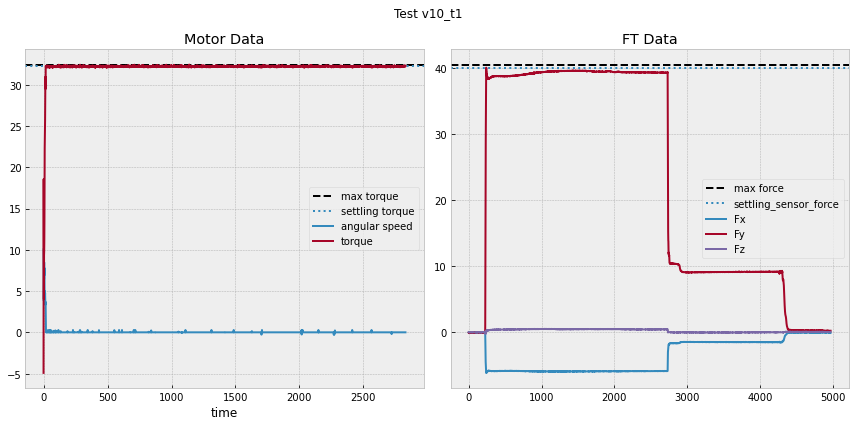

../TangentForceTests/config3_v20_t2.csv
C:/Users/jlimk/Documents/5-17-24_screwshell_tangentforce_tests_ft_data\test2.csv
Max Motor Torque =  32.4521484375
Steady State Motor Torque =  32.1943359375
Max Sensor Force =  45.742577082870234
Steady State Sensor Force =  41.65016617379307
Effective Torque at Screw Shell: Peak = 4.116831937458321, Steady State = 3.748514955641376


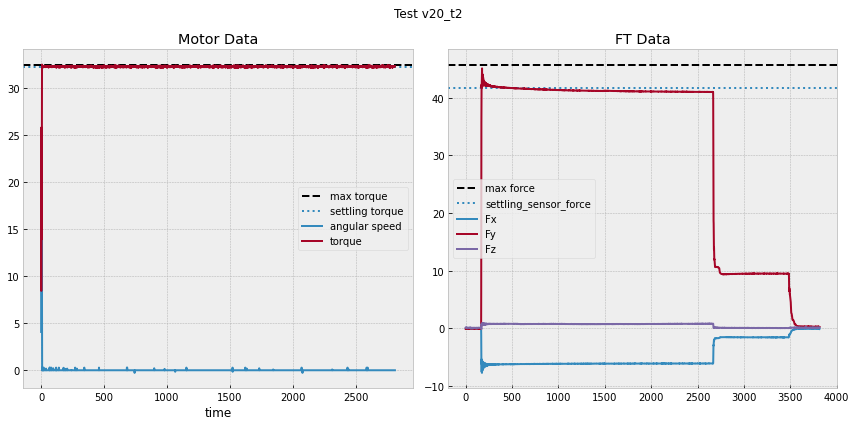

../TangentForceTests/config3_v40_t3.csv
C:/Users/jlimk/Documents/5-17-24_screwshell_tangentforce_tests_ft_data\test3.csv
Max Motor Torque =  33.322265625
Steady State Motor Torque =  32.2265625
Max Sensor Force =  66.01842962891575
Steady State Sensor Force =  42.203706002756725
Effective Torque at Screw Shell: Peak = 5.941658666602418, Steady State = 3.7983335402481053


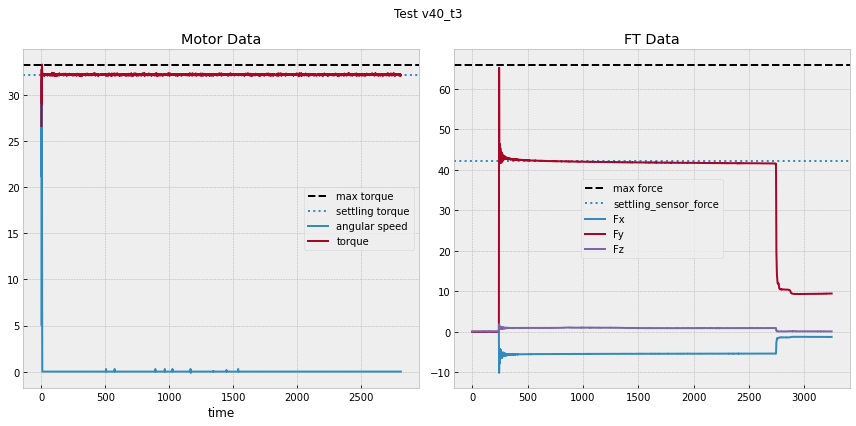

../TangentForceTests/config3_v50_t4.csv
C:/Users/jlimk/Documents/5-17-24_screwshell_tangentforce_tests_ft_data\test4.csv
Max Motor Torque =  33.43505859375
Steady State Motor Torque =  32.37158203125
Max Sensor Force =  76.71524375628418
Steady State Sensor Force =  60.69429613067203
Effective Torque at Screw Shell: Peak = 6.904371938065576, Steady State = 5.462486651760482


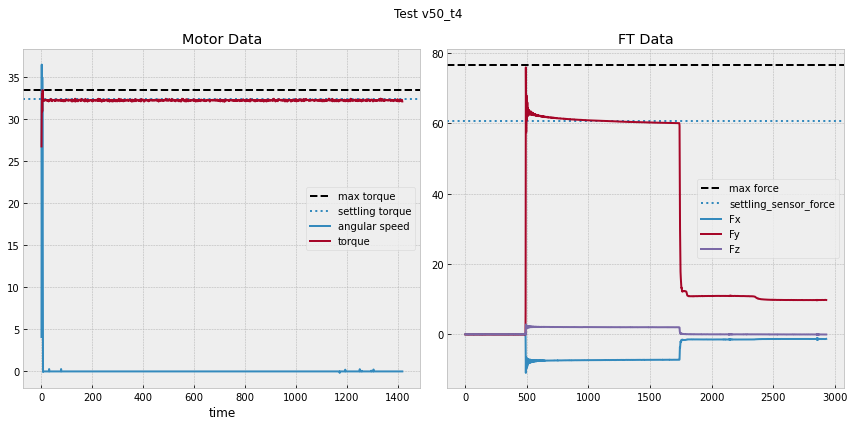

In [9]:
### Read in motor data
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('bmh')

screw_shell_radius = 0.09 # m


motor_data = []
ft_data = []
motor_data_folder = "../TangentForceTests/"
ft_data_folder = "C:/Users/jlimk/Documents/5-17-24_screwshell_tangentforce_tests_ft_data"
# ft_data_folder = "c:/Users/motiongenesis/Documents/5-17-24_screwshell_tangentforce_tests"
motor_file_suffixes = ["v10_t1", "v20_t2", "v40_t3", "v50_t4"]
for i in range(4):
    motor_data_filename = os.path.join(motor_data_folder, f"config3_{motor_file_suffixes[i]}.csv")
    ft_data_filename = os.path.join(ft_data_folder, f"test{i+1}.csv")
    print(motor_data_filename)
    print(ft_data_filename)
    cur_motor_data = pd.read_csv(motor_data_filename)
    cur_ft_data = pd.read_csv(ft_data_filename, skiprows=list(range(6)))
    motor_data.append(cur_motor_data)
    ft_data.append(cur_ft_data)

    max_motor_torque = cur_motor_data["torque"].abs().max()
    settling_motor_torque = cur_motor_data["torque"][1000]
    max_sensor_force = np.linalg.norm([cur_ft_data[" Fx "].abs().max(), cur_ft_data[" Fy "].abs().max()])
    settling_sensor_force = np.linalg.norm([cur_ft_data[" Fx "].abs()[1500], cur_ft_data[" Fy "].abs()[1500]])

    print("Max Motor Torque = ", max_motor_torque)
    print("Steady State Motor Torque = ", settling_motor_torque)
    # print("Max Sensor Force y", cur_ft_data[" Fy "].max())
    # print("Max Sensor Force x", cur_ft_data[" Fx "].abs().max())
    print("Max Sensor Force = ", max_sensor_force)
    print("Steady State Sensor Force = ", settling_sensor_force)
    print(f"Effective Torque at Screw Shell: Peak = {max_sensor_force*screw_shell_radius}, Steady State = {settling_sensor_force*screw_shell_radius}")

    fig, axes = plt.subplots(1, 2, figsize=(12, 6), facecolor="white")

    fig.suptitle(f"Test {motor_file_suffixes[i]}")

    axes[0].set_title("Motor Data")
    axes[0].axhline(max_motor_torque, linestyle = '--', color = 'black', label="max torque")
    axes[0].axhline(settling_motor_torque, linestyle = ':', label="settling torque")
    axes[0].plot(cur_motor_data["angular speed"], label="angular speed")
    axes[0].plot(cur_motor_data["torque"], label="torque")
    # axes[0].axhline(max_motor_torque)
    axes[0].legend()
    axes[0].set_xlabel("time")

    axes[1].set_title("FT Data")
    axes[1].axhline(max_sensor_force, linestyle = '--', color = 'black', label="max force")
    axes[1].axhline(settling_sensor_force, linestyle = ':', label="settling_sensor_force")
    axes[1].plot(cur_ft_data[' Fx '], label="Fx")
    axes[1].plot(cur_ft_data[' Fy '], label="Fy")
    axes[1].plot(cur_ft_data[' Fz '], label="Fz")
    # axes[1].axhline(max_sensor_torque)
    axes[1].legend()

    plt.tight_layout()
    plt.show()

    # measured_torque_constant = max_sensor_torque / max_motor_torque
    # print(f"Max Motor Torque = {max_motor_torque}")
    # print(f"Max Sensor Torque = {max_sensor_torque}")
    # print(f"Torque Constant = {measured_torque_constant}")


Peak Sensor Torque = 1.411335
Peak Tangential Force = 18.21077419354839


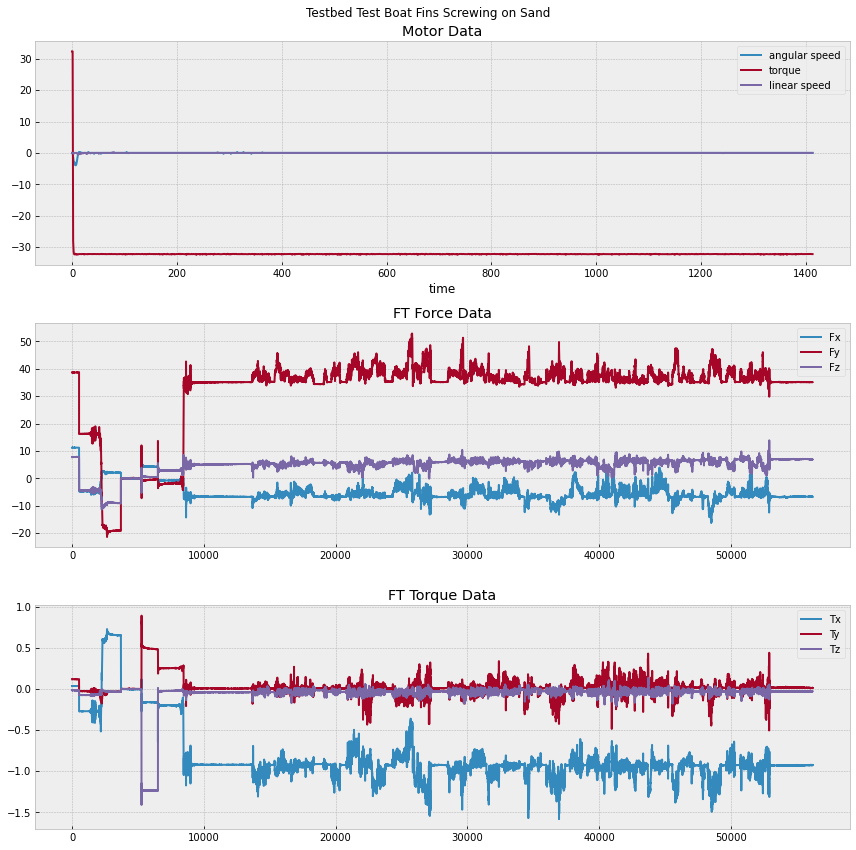

Peak Sensor Torque = 1.501734
Peak Tangential Force = 19.377212903225804


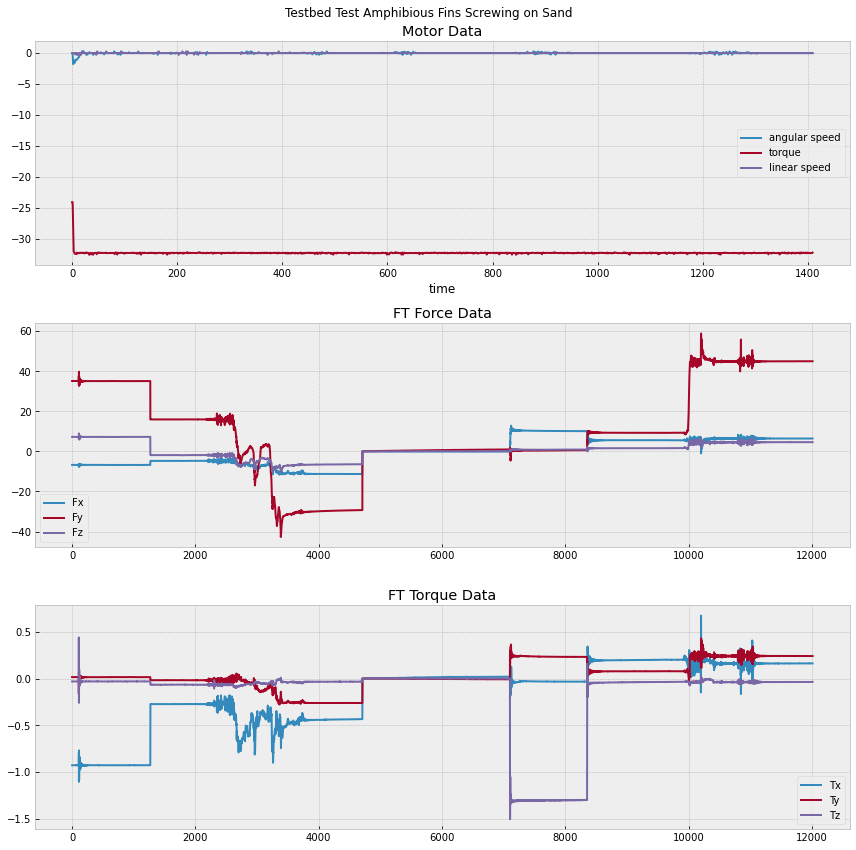

Peak Sensor Torque = 1.372586
Peak Tangential Force = 17.710787096774194


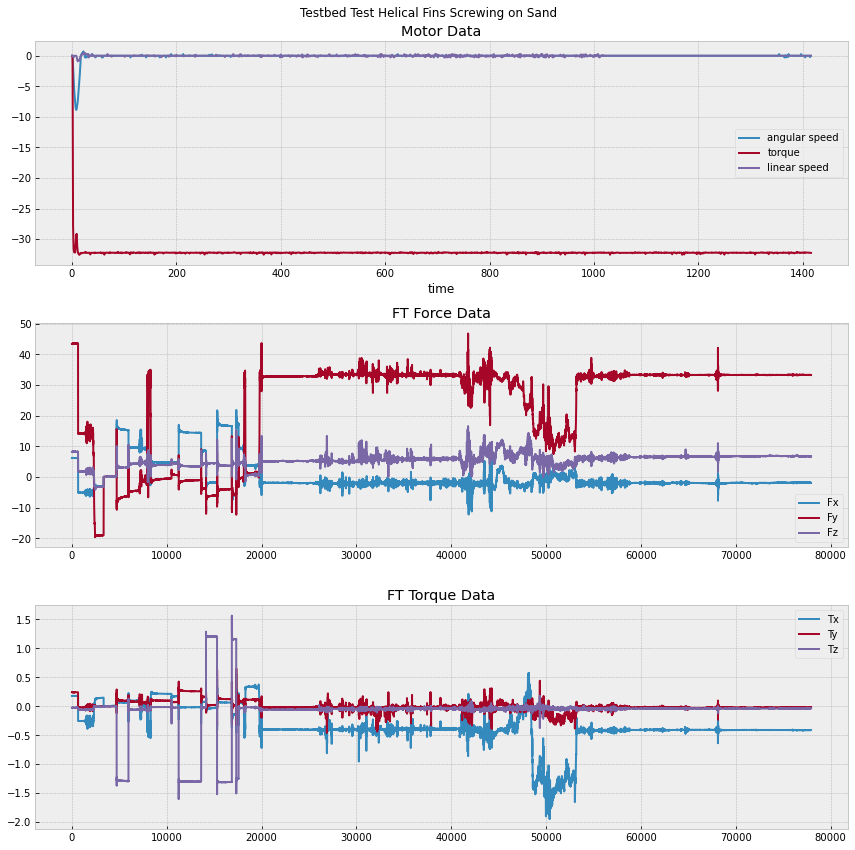

Peak Sensor Torque = 1.479624
Peak Tangential Force = 19.09192258064516


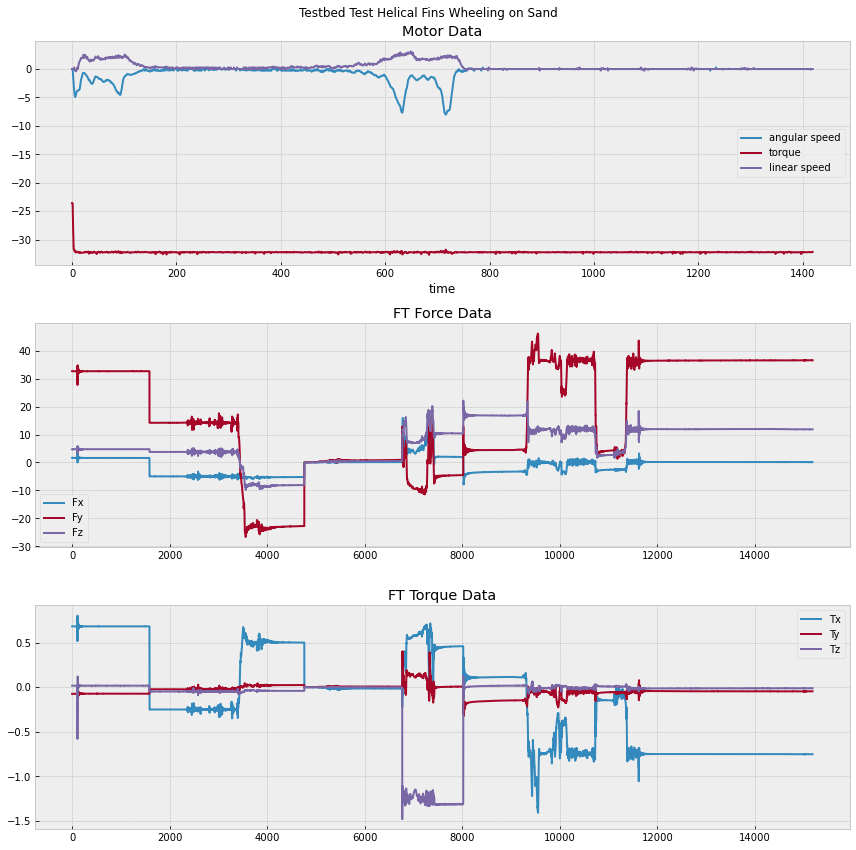

Peak Sensor Torque = 1.357353
Peak Tangential Force = 17.514232258064517


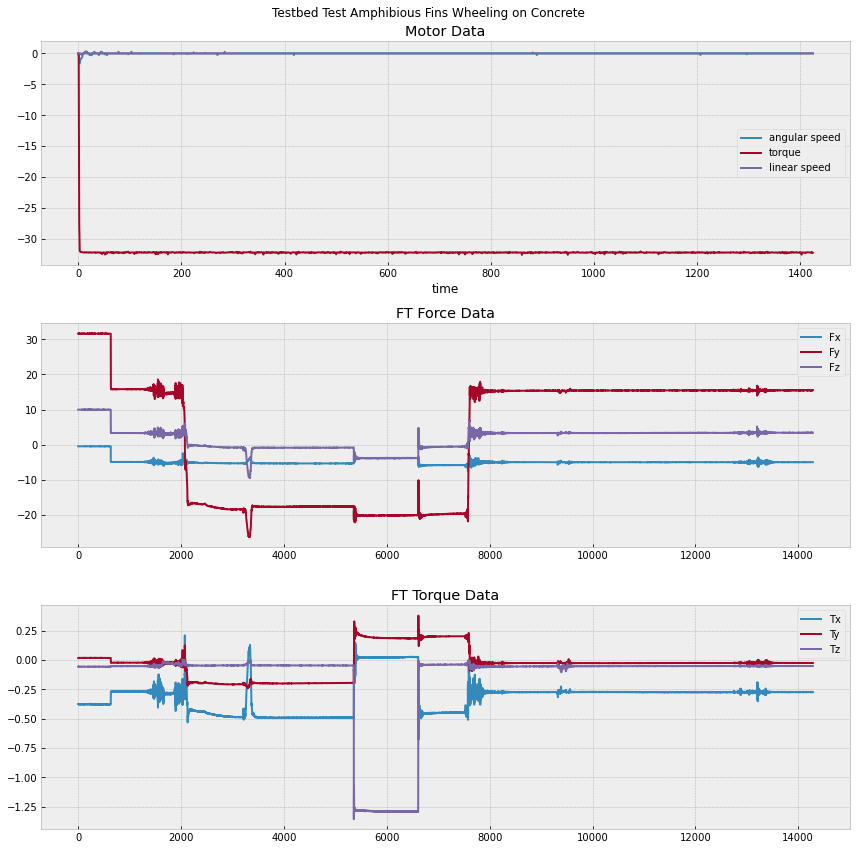

Peak Sensor Torque = 1.547447
Peak Tangential Force = 19.96705806451613


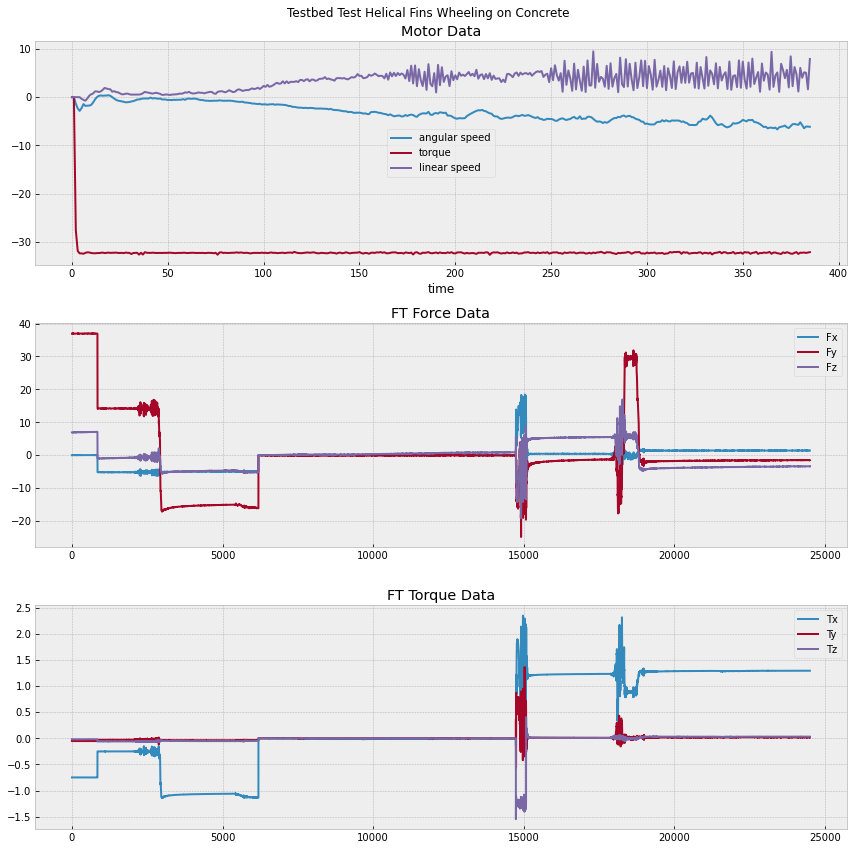

Peak Sensor Torque = 1.466737
Peak Tangential Force = 18.92563870967742


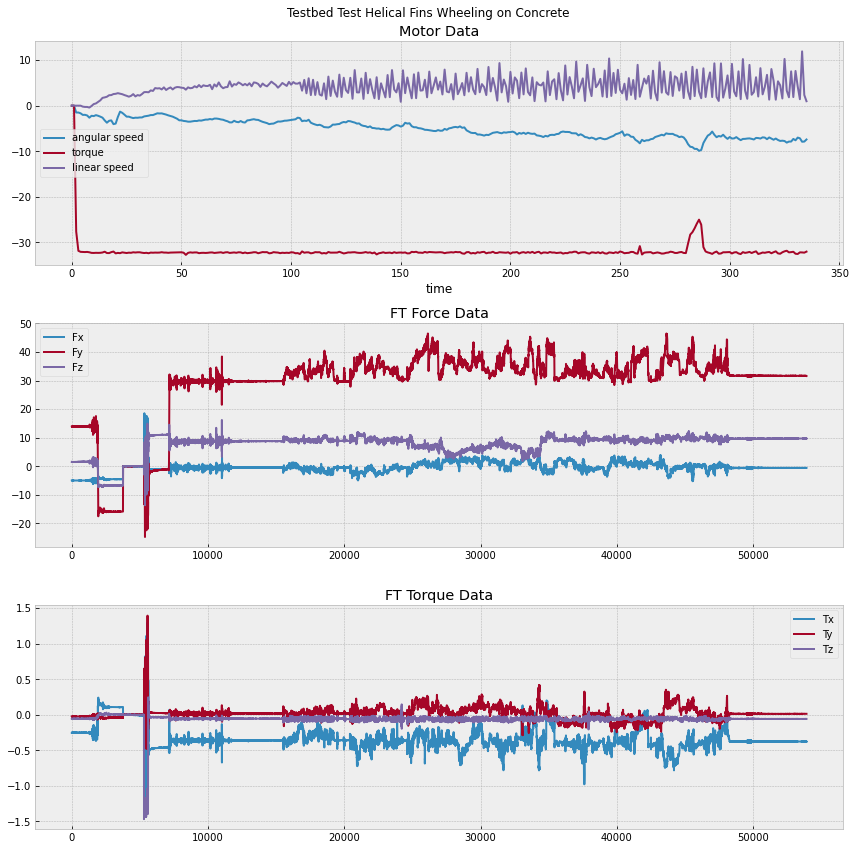

In [11]:
### Process Sand/Concrete tests

screw_shell_radius = 0.0775 #m

ft_data_folder = r"C:\Users\jlimk\Documents\5-16-24_Sand_Concrete_tests\FTS Data"
motor_data_folder = "../../ScrewTestScripts/sand_tests"

test_names = {"1111": "Boat Fins Screwing on Sand",
			  "1211": "Amphibious Fins Screwing on Sand",
			  "1311": "Helical Fins Screwing on Sand",
			  "2311": "Helical Fins Wheeling on Sand",
			  "3211": "Amphibious Fins Wheeling on Concrete",
			  "3311": "Helical Fins Wheeling on Concrete",
			  "3312": "Helical Fins Wheeling on Concrete"}

for f in os.listdir(ft_data_folder):
	test_suffix = f.strip("ftest.csv")
	ft_data = pd.read_csv(os.path.join(ft_data_folder, f), skiprows=list(range(6)))
	motor_data = pd.read_csv(os.path.join(motor_data_folder, f"test{test_suffix}.csv"))

	if test_suffix == "1311":
		max_sensor_torque = ft_data[" Tz "][:10000].abs().max()
	else:
		max_sensor_torque = ft_data[" Tz "].abs().max()
	print(f"Peak Sensor Torque = {max_sensor_torque}")
	print(f"Peak Tangential Force = {max_sensor_torque / screw_shell_radius}")

	fig, axes = plt.subplots(3, 1, figsize=(12, 12), facecolor="white")

	fig.suptitle(f"Testbed Test {test_names[test_suffix]}")

	axes[0].set_title("Motor Data")
	# axes[0].axhline(max_motor_torque, linestyle = '--', color = 'black', label="max torque")
	# axes[0].axhline(settling_motor_torque, linestyle = ':', label="settling torque")
	axes[0].plot(motor_data["angular speed"], label="angular speed")
	axes[0].plot(motor_data["torque"], label="torque")
	axes[0].plot(motor_data["linear speed"], label="linear speed")
	# axes[0].axhline(max_motor_torque)
	axes[0].legend()
	axes[0].set_xlabel("time")

	# axes[1].axhline(max_sensor_force, linestyle = '--', color = 'black', label="max force")
	# axes[1].axhline(settling_sensor_force, linestyle = ':', label="settling_sensor_force")
	axes[1].set_title("FT Force Data")
	axes[1].plot(ft_data[' Fx '], label="Fx")
	axes[1].plot(ft_data[' Fy '], label="Fy")
	axes[1].plot(ft_data[' Fz '], label="Fz")
	axes[1].legend()

	axes[2].set_title("FT Torque Data")
	axes[2].plot(ft_data[' Tx '], label="Tx")
	axes[2].plot(ft_data[' Ty '], label="Ty")
	axes[2].plot(ft_data[' Tz '], label="Tz")
	# axes[1].axhline(max_sensor_torque)
	axes[2].legend()

	plt.tight_layout()
	plt.show()

	